In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
from sklearn.datasets import make_circles

In [17]:
x, y = make_circles(n_samples=1000, shuffle=True, noise=0.03, random_state=42)


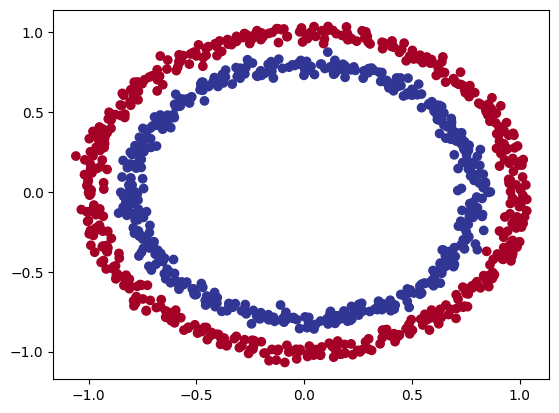

In [18]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [19]:
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [20]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [21]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
    ]
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(x, y, epochs=100, verbose=0)


In [22]:
model_1.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [24]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1),
    ]
)

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(x, y, epochs=100, verbose=0)
model_2.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4131 - loss: 0.6928  


[0.6935296654701233, 0.4189999997615814]

In [26]:
tf.__version__

'2.19.0'

In [27]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(x, y, epochs=100, verbose=0)
model_3.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 0.6925


[0.6946324706077576, 0.4860000014305115]

In [28]:


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_ini = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_ini)
    zz = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


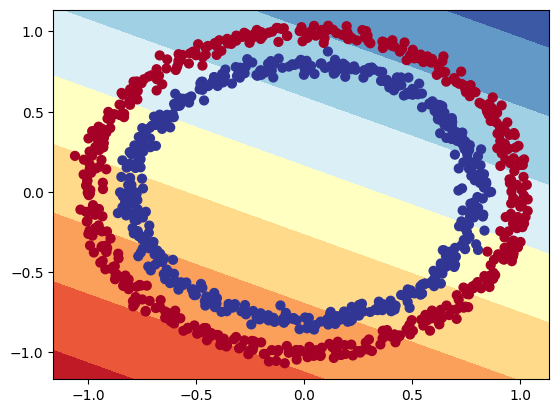

In [29]:
plot_decision_boundary(model_3, x, y)

In [30]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_4 = model_4.fit(x, y, epochs=100, verbose=0)
model_4.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 0.6918


[0.6960086226463318, 0.4909999966621399]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


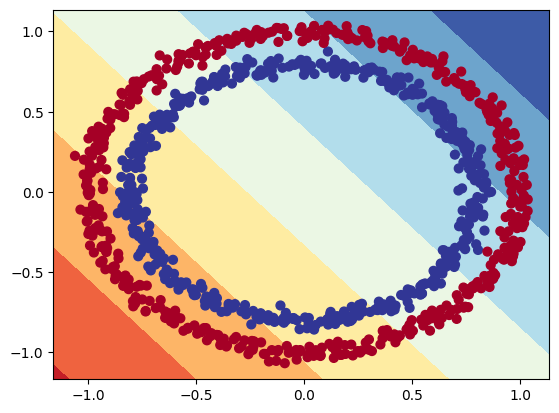

In [31]:
plot_decision_boundary(model_4, x, y)

In [34]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1),
    ]
)

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_5 = model_5.fit(x, y, epochs=100, verbose=0)
model_5.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0022


[0.0024426861200481653, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


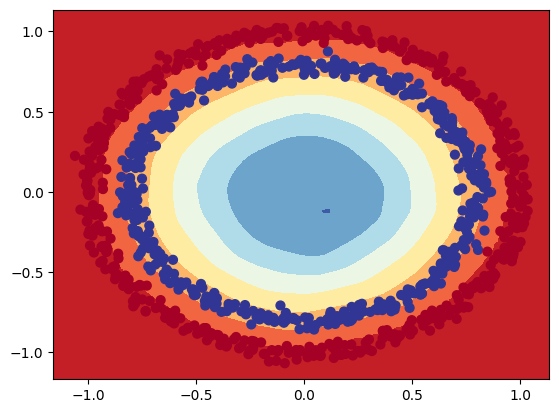

In [35]:
plot_decision_boundary(model_5, x, y)

In [36]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
    ]
)

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_6 = model_6.fit(x, y, epochs=100, verbose=0)
model_6.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.5292


[0.521517813205719, 0.7300000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


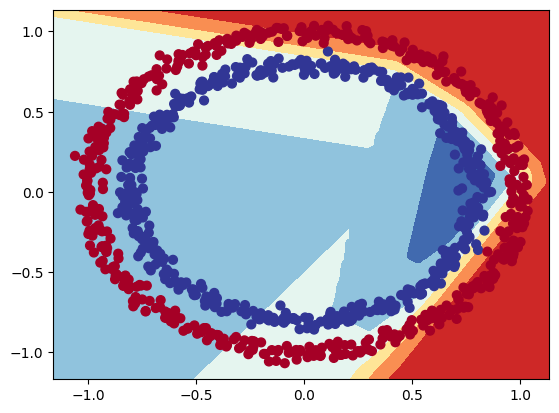

In [37]:
plot_decision_boundary(model_6, x, y)